In [1]:
import pandas as pd
import functions as fnc
import variables as var
import toolbox

In [2]:
df = pd.read_csv("./data/lifesat_full.csv")
df.head()

,Country,GDP per capita (USD),Life satisfaction,Life expectancy,Homicide rate,Employment rate
0,South Africa,11466.189672,4.725336,57.5,13.7,43.0
1,Colombia,13441.492952,6.302556,76.2,24.5,67.0
2,Brazil,14063.982505,6.415187,74.8,26.7,61.0
3,Mexico,17887.750736,6.536861,75.4,18.1,61.0
4,Chile,23324.524751,6.538143,79.9,4.2,63.0


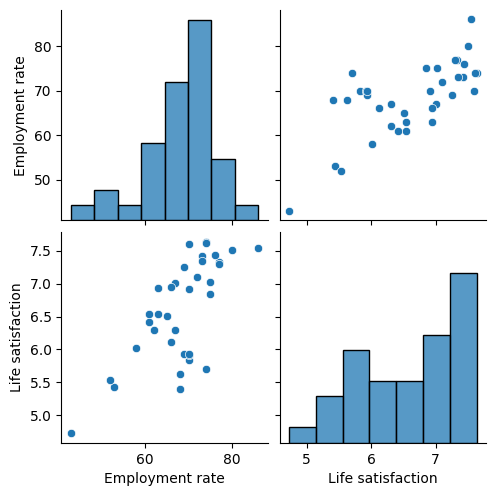

In [3]:
target = "Employment rate"
columns = toolbox.plot_features_num_regression(df, target, columns=['GDP per capita (USD)', 'Life satisfaction'], umbral_corr=0.4, pvalue=0.00004, max_pairplot_column=2)
